# MODEL TRAINING

### 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/student_info.csv')

#### X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [5]:
num_features= X.select_dtypes(include=[np.number]).columns
cat_features= X.select_dtypes(exclude= 'O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform= StandardScaler()
oh_transformer= OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ('StandardScaler', numeric_transform, num_features),
        ('OneHotEncoder', oh_transformer, cat_features)
    ]
)

X= preprocessor.fit_transform(X)

# separating dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

Create an Evaluate Function to give all metrics after model Training

In [6]:
def evaluate_model(true, predicted):
    mae= mean_absolute_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_square= r2_score(true, predicted)
    return mae, rmse, r2_square

In [7]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Refressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
rmse_list=[]
r2_list=[]


for model_name, model in models.items():
    #Train Model
    model.fit(X_train,y_train)
    # Make Predictions
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2_square= evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_square= evaluate_model(y_test, y_test_pred)

    print(model_name)

    model_list.append(model_name)
    r2_list.append(model_test_r2_square)
    rmse_list.append(model_test_rmse)

    print('Model performace for Training set')
    print('Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('Root Mean Square Error: {:.4f}'.format(model_train_rmse))
    print('R2 Score: {:.4f}'.format(model_train_r2_square))

    print('_________________________________________')

    print('Model performance of Test set')
    print('Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('Root Mean Square Error: {:.4f}'.format(model_test_rmse))
    print('R2 Score: {:.4f}'.format(model_test_r2_square))

    print('='*30)
    print()




Linear Regression
Model performace for Training set
Mean Absolute Error: 6.2872
Root Mean Square Error: 7.8301
R2 Score: 0.7280
_________________________________________
Model performance of Test set
Mean Absolute Error: 7.9516
Root Mean Square Error: 9.7757
R2 Score: 0.6073

Lasso
Model performace for Training set
Mean Absolute Error: 6.9821
Root Mean Square Error: 8.6808
R2 Score: 0.6658
_________________________________________
Model performance of Test set
Mean Absolute Error: 7.3635
Root Mean Square Error: 8.8751
R2 Score: 0.6763

Ridge
Model performace for Training set
Mean Absolute Error: 6.3800
Root Mean Square Error: 7.8737
R2 Score: 0.7250
_________________________________________
Model performance of Test set
Mean Absolute Error: 7.6834
Root Mean Square Error: 9.3038
R2 Score: 0.6443

K-Neighbours Regressor
Model performace for Training set
Mean Absolute Error: 5.9915
Root Mean Square Error: 7.4496
R2 Score: 0.7538
_________________________________________
Model performance 

### Result

In [8]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
1,Lasso,0.676304
8,AdaBoost Regressor,0.674843
2,Ridge,0.644281
7,CatBoosting Refressor,0.618516
0,Linear Regression,0.607276
3,K-Neighbours Regressor,0.600971
5,Random Forest Regressor,0.568521
6,XGBRegressor,0.527554
4,Decision Tree,0.439413


In [9]:
pd.DataFrame(list(zip(model_list, rmse_list)), columns=['Model Name', 'RMSE Score']).sort_values(by=['RMSE Score'], ascending=True)

,Model Name,RMSE Score
1,Lasso,8.875116
8,AdaBoost Regressor,8.895117
2,Ridge,9.303768
7,CatBoosting Refressor,9.634814
0,Linear Regression,9.775728
3,K-Neighbours Regressor,9.853882
5,Random Forest Regressor,10.246725
6,XGBRegressor,10.722143
4,Decision Tree,11.679571


We will choose Lasso Regression since it has the least Root Mean Square Error and the hightest R2 Score.

## Lasso Regression

In [10]:
lasso_model= Lasso(alpha=0.1, fit_intercept=True)

lasso_model= lasso_model.fit(X_train, y_train)

y_pred= lasso_model.predict(X_test)

score= r2_score(y_test, y_pred)*100

print("Accuracy of the Lasso Regression model is %.2f%%"% score)



Accuracy of the Lasso Regression model is 68.24%


Plot y_pred and y_test

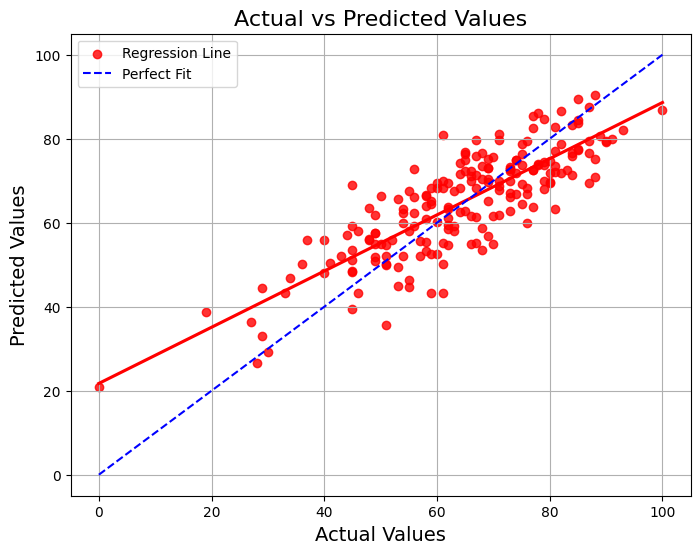

In [11]:
# Create the plot
plt.figure(figsize=(8, 6))

sns.regplot(x=y_test, y=y_pred, ci=None, color='red', label='Regression Line')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.grid(True)

plt.legend()

plt.show()